### **Deutsch Algorithm**

---


In [ ]:
print(1+2)


<br>

**Problem Statement** :
You are given a hidden function $f: \{0, 1\} \to \{0, 1\}$ which is guaranteed to be either:

* Constant: $f(0) = f(1)$
* Balanced: $f(0) \neq f(1)$


**Goal:**
Determine if the function is constant or balanced.

---

<br>

**Classical vs Quantum**

* Classical computer: Needs two evaluations: $f(0)$ and $f(1)$.
* Quantum computer: Needs only one evaluation, using superposition.

---



<br>

**How the Deutsch Algorithm Works**

1. Prepare two qubits
    * First qubit: $|0\rangle$
    * Second qubit: $|1\rangle$

<br>

2. Put both qubits into superposition using Hadamard ($H$)
    <br>This allows the oracle to evaluate $f(0)$ and $f(1)$ at the same time.

<br>

3. Apply the Oracle
    <br>The oracle applies the transformation:
    $$|x, y\rangle \to |x, \, y \oplus f(x)\rangle$$
    It “encodes” information about $f$ into the phase (phase kickback).

<br>

4. Apply Hadamard on the first qubit
    <br>This extracts the global information about the function type.

<br>

5. Measure the first qubit
    - Measurement 0     =>      CONSTANT function
    - Measurement 1     =>      BALANCED function

---

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator




<br>

f:Σ→Σ from one bit to one bit
 <br>There are four such functions
 
 - case = 1 → f(0)=0, f(1)=0    →   do nothing!

<br>

 - case = 2 → f(0)=1, f(1)=1    →   flip output!

<br>

 - case = 3 → f(0)=0, f(1)=1    →   flip only if 1!

<br>

 - case = 4 → f(0)=1, f(1)=0    →   flip only if 0!

---

In [ ]:
# -----------------------------------------
# 1. Oracle for the four possible functions
# -----------------------------------------

def deutsch_oracle(case):
    qc = QuantumCircuit(2)

    if case == 1:
        pass

    elif case == 2:
        qc.x(1)

    elif case == 3:
        qc.cx(0, 1)

    elif case == 4:
        qc.cx(0, 1)
        qc.x(1)
    return qc

In [ ]:
# -----------------------------------------
# 2. Deutsch's algorithm circuit
# -----------------------------------------

def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)

    qc.x(1)
    qc.barrier()

    qc.h(0)
    qc.h(1)
    qc.barrier()

    qc.compose(oracle, inplace=True)
    qc.barrier()

    qc.h(0)
    qc.barrier()

    qc.measure(0, 0)
    return qc


/Users/shyam/Documents/Quantum Projects/qiskit_venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


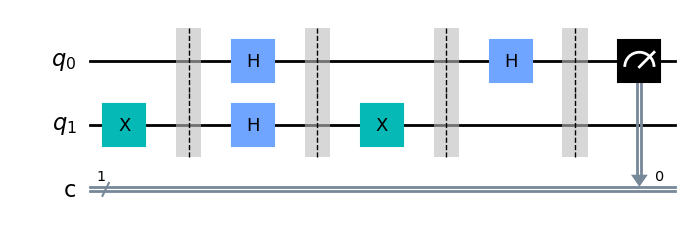

In [ ]:
case = 2
oracle = deutsch_oracle(case)
qc = deutsch_algorithm(oracle)
qc.draw("mpl")

Counts :  {'0': 1024}


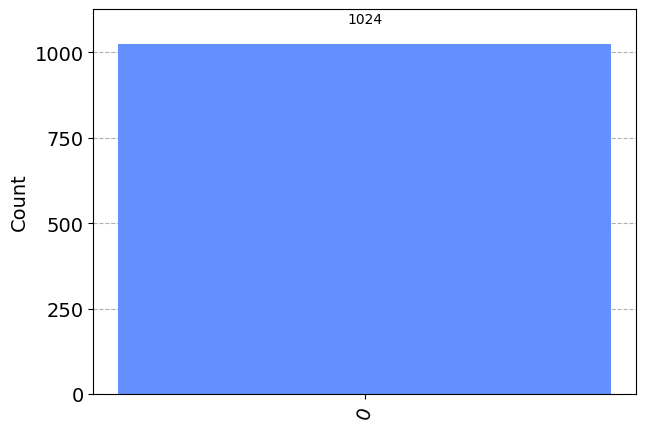

In [ ]:

backend = AerSimulator()
result = backend.run(qc).result()
counts = result.get_counts()
print("Counts : ", counts)
plot_histogram(counts)

In [ ]:
# Interpret the result
if "0" in counts:
    print("→ Function is CONSTANT")
else:
    print("→ Function is BALANCED")

→ Function is CONSTANT
